# Basic Stats in Python and Notebooks

<b>Note: I removed the "updated" from the title between class 1 and class 2, we'll look at pulling from my repository at the start of class.</b>

This type of file is called a notebook. They are commonly used in data science. 
These notebooks allow us to write code, execute code, and add webpage style text all in one spot.
Each 'block' is called a cell. Markdown cells are like this one, they have text. Code cells are like the one below, that's where our code goes.
The little play sign next to each code cell is how we run (execute) that bit of code. Any errors or results will print below that cell. 


### Import Libraries

The imports that we have here allow us to load external code packages that will help us do stuff. We can load things that will help us draw charts, make models, do math, etc...

There's actually relatively little "stuff" that is part of a programming language like Python. Each of these libraries is a collection of functionality made by someone else that we can import into our programs and use as if we wrote it. For example, right now we are importing:
<ul>
<li>Two from the maker of the text "thinkstats/plot", these provide us with some useful stats calculations as well as some easy graphing. 
<li>Pandas, which gives us dataframes - a data structure (thing that holds data) that is a kind of python-spreadsheet. 
<li>Numpy, which gives us some other common mathmatical functionality. 
</ul>

Normally, when we want to do something different we'll need to load some of these libraries, which will give us the toolset without forcing us to make things from scratch. When we installed Anaconda, a bunch of these libraries were installed by default, these are the ones that we can import. There are other ones that we'll need to install before we can use them. Installing things can be done in a few ways, such as:
<ul>
<li> Running "conda install <name>" from a terminal. 
<li> Running "pip install <name>" from a terminal. (We'll install pip now)
<li> The GUI in Anaconda. 
<li> Using "!pip install <name>" in code. (This is useful later on in the ML class, when we use Colab)
</ul>

Note that this stuff can differ, in annoying ways, from system to system - especially if you're using Windows. On a Mac it is relatively easier. You may get some weird errors or issues that need to be investigated and dealt with individually. 

### Environments

One thing to pay attention to is that we can have different environments in which your python code can run. These environments can differ because they can each hold different stuff, such as different versions of python and different sets of installed libraries. For us, having different environemnts is not really very useful, if someone is developing real software it can be important because someone can build and test their program in one environment with a specific set of stuff, and know that as long as that environment is kept the same, this code can be used anywhere and should work fine. Things like updates to the kernel, changes to libraries (e.g. even a name change to a function will break things), or updates that break other things won't break our program because it is in one specific environment; if we wanted to update something, we can test it and fix issues in a controlled way. This is pretty analogous to something like the Windows or Mac updates pushed out to your computer, once in a while an update will break some installed program in some way; large companies generally stop these updates from happening automatically so they can test the changes, then they push out the update once they are clear it doesn't cause an issue. Here, developers can not update new changes to the environment until they have a chance to check and see that nothing breaks. 

If we are working on different types of projects, we can also have environments setup with all of their libraries installed and configured. For example, developing neural networks to do image recognition generally uses big sets of libraries that are useful for that specific application. We might have one environment for this, and another that has all of the stuff needed for out other work where we are processing text. I created a backup environment last year before I installed some libraries that might interact with others and cause issues. 

For us, we need to set the environment when we run code. We can see the environment in the upper right of the editor window. If we run code and nothing works, and we get messages that common stuff is missing, this is a likely culprit. 

In [42]:

#The pound sign means a comment, you can write free text here that will be ignored when you run some code. 
#Import some libraries - these packages have usefull stuff that we can use to make out lives easier....
#The 'as pd' thing just gives us a nickname, we'll use that pandas name often, and pd is easier to type
#Using pandas as pd isn't required, but is almost universally common. Same with numpy. 
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np 

### Load Data

We'll load some data in from a CSV flie to get started. The data will get loaded into something called a dataframe, which is a type of data structure - or programming thing that holds data. Functionally, it is basically like turning the data in that file into a spreadsheet in our program, we can then manipulate that spreadsheet to do what we want. Once the data is loaded, the head function lets us take a peek at the first 5 rows. 

<b>Look at the data - what's cetegorical, what is numerical?</b>

In [43]:
#The 'pd' that we imported before gives us something called a dataframe
#The df as a name for the dataframe is a common standard, it can be anything
#Head gives the first 5 rows, Tail gives the last 5 rows there is also a sample option.
#You can change the number of rows by putting the number in paranthesis 
df = pd.read_csv("data/train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

#### Variables in Memory

The basic process of writing a computer program is to create variables (objects) that exist in the computer's memory, then "do things" to those varaibles in memory to make them into what we want for a result. For example, we may have "a = 5" and "b = 7" as two variables, and we may have another step that says "a * b" to get 35 - our final result. 

In the example above we are placing that entire 2D table into a varaible called df. We then use the function "head()" to get a preview of the first 5 rows. Using "print" type of statements such as that are a good way to check what is in our variables as we proceed. We can also use VS Code's Variables window to see a list of our variables. 

This can often be helpful, especially as we become acustomed to programming. 

#### Dataframe Columns and Info

Each variable, or feature as they are called in data science is stored in a column of our spreadsheet-like dataframe. In addition to their value (in this case df holds that table of data), variables are objects that have a certain type - i.e. here "df" is a dataframe type object. Objects, in addition to their data, can hold other values - attributes, as well as other "capabilities" - functions. 

The .columns below is an attribute - columns is a list of the column names of the dataframe. Here we are asking for what value. 

In [44]:
#See what columns we have
#This is calling a value that exists inside our dataframe, so it is just "object.value".
#You'll learn more on this in the programming class.

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We can also see a little more details on this... Info() is a function in the dataframe class, so any dataframe can have it called. Here when we call "info()" it will run some code on the object df that will generate the info printed below. 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Addressing Columns

We can 'grab' a column by using the name (in a couple of ways), or the position (0,1,2,3...) Think about how this relates to the stuff above. 

In [46]:
#This works, we'll usually avoid it because it is not quite as clear
df.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [47]:
#This also works, and is sometimes usefull if you're doing things like looping through data
#It is probably more confusing in most cases though, so we won't use it.
#Survived is the second column, and in programming we (almost) always start counting at 0. So we are getting column #1
df.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [48]:
#This is probably the most simple way, and this is what I'll try to use all the time
#Unless specified explicity, you can use whatever you want (in general, not just this)
#This will be the easiest to keep straight, I think
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Try It

<ul>
<li> Print the "embarked" column.
<li> Put the "fare" column into its own variable, then print the head() of that new object
<li> Print two columns at once - i.e. rather than slicing out one column, do two at the same time. Use "Survived" and "Age". This might need some Googling. 
</ul>

In [49]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [50]:
fare_data =df['Fare']
fare_data.head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [51]:
#Challenge - print multiple columns. Survived and Age!
#You may need to Google, think about what to Google and try to implement what you find
#df.iloc[:[1,5]]???
df[['Survived','Age']]


Survived   Age
0           0  22.0
1           1  38.0
2           1  26.0
3           1  35.0
4           0  35.0
..        ...   ...
886         0  27.0
887         1  19.0
888         0   NaN
889         1  26.0
890         0  32.0

[891 rows x 2 columns]

In [52]:
df['Survived']=df['Survived'].astype(bool)
df.head()

PassengerId  Survived  Pclass  \
0            1     False       3   
1            2      True       1   
2            3      True       3   
3            4      True       1   
4            5     False       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Basic Stats

We can get some basic statistics on each column, to see what we have.

In [53]:
#This time we're calling a function that exists inside our dataframe, so it is "object.function()". Note the brackets.
# Same deal, learn this in the other class.
df.describe(include="all")

PassengerId Survived      Pclass                     Name   Sex  \
count    891.000000      891  891.000000                      891   891   
unique          NaN        2         NaN                      891     2   
top             NaN    False         NaN  Braund, Mr. Owen Harris  male   
freq            NaN      549         NaN                        1   577   
mean     446.000000      NaN    2.308642                      NaN   NaN   
std      257.353842      NaN    0.836071                      NaN   NaN   
min        1.000000      NaN    1.000000                      NaN   NaN   
25%      223.500000      NaN    2.000000                      NaN   NaN   
50%      446.000000      NaN    3.000000                      NaN   NaN   
75%      668.500000      NaN    3.000000                      NaN   NaN   
max      891.000000      NaN    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.699118    0.523008    0.381594     NaN   32.204208      NaN   
std      14.526497    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      20.125000    0.000000    0.000000     NaN    7.910400      NaN   
50%      28.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      38.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

We can also rotate, or transpose, the result if we want to look at it the other way. 

In [54]:
#.T rotates it 90 degrees to make it easier to read
df.describe(include="all").T

count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived       891      2                    False  549        NaN   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
PassengerId  257.353842   1.0   223.5    446.0  668.5     891.0  
Survived            NaN   NaN     NaN      NaN    NaN       NaN  
Pclass         0.836071   1.0     2.0      3.0    3.0       3.0  
Name                NaN   NaN     NaN      NaN    NaN       NaN  
Sex                 NaN   NaN     NaN      NaN    NaN       NaN  
Age           14.526497  0.42  20.125     28.0   38.0      80.0  
SibSp          1.102743   0.0     0.0      0.0    1.0       8.0  
Parch          0.806057   0.0     0.0      0.0    0.0       6.0  
Ticket              NaN   NaN     NaN      NaN    NaN       NaN  
Fare          49.693429   0.0  7.9104  14.4542   31.0  512.3292  
Cabin               NaN   NaN     NaN      NaN    NaN       NaN  
Embarked            NaN   NaN     NaN      NaN    NaN       NaN

#### Individual Statistics

In addition to the bulk calculations done with describe, we can also ask for specific values. (Here I use print statements to get more than one line of text, and add in some labels as well)

Note: Think about the variables generated in this code. Look especially at line 2. What is an object? What is "name"? 

In [55]:
sample_col = df["Fare"]
print("Some Basic Statistics for", sample_col.name)

print("Mean:", sample_col.mean())
print("N:", sample_col.count())
print("Median:", sample_col.median())
print("Variance", sample_col.var())
print("Stan. Dev.", sample_col.std())

Some Basic Statistics for Fare
Mean: 32.2042079685746
N: 891
Median: 14.4542
Variance 2469.436845743117
Stan. Dev. 49.693428597180905


#### Try It

Print basic statistics for the object you made above with the "fare" data. 

In [56]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
from random import sample


Sample_col = df['Age']
print('some Basic Statistic for', sample_col.name)
print('N:', sample_col.count())
print('Mean:', sample_col.mean())
print('Median:', sample_col.median())
print('Variance:', sample_col.var())
print('Stan. Dev:', sample_col.std())

some Basic Statistic for Fare
N: 891
Mean: 32.2042079685746
Median: 14.4542
Variance: 2469.436845743117
Stan. Dev: 49.693428597180905


#### Value Counts

In programming talk, null means nothing (not 0, or blank, literally nothing). So, we are checking to see which columns have a bunch of missing values. In the table above the NaN (Not a Number) represents the same concept. 

In computer-speak, true/false values are called Boolean variables. 

In [58]:
#it returns true for rows that are empty
#what is NaN???
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

We can also chain function calls together, to do more stuff. The code below will take the "isnull" results from above, and the sum() function will add them up. Recall: true/false is 1/0 in computer-speak, so we can just add all the ones. 

In [59]:
#Try to tally it up and count how many NULLs we have. 
#It is simple (one line) - try to Google and implement. 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Value Count

When we have more than just true/false data, we can use a different function to add up the results for us. 

In [60]:
#How many people lived? Look at the Survived column and tally it up.
#In programming 0/1 for true false is common. 0=false, 1=true. Virtually always. 
df["Survived"].value_counts()

False    549
True     342
Name: Survived, dtype: int64

In [61]:
#Value counts can also help us figure out if there is any junk.
df["Embarked"].value_counts().sort_values(ascending=False)

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Try It

Count the number of null values we have in the "age" column.

In [62]:
df["Age"].isnull().sum()

177

In [95]:
df = pd.read_csv("data/train.csv")

#### Dataframe Manipulation

The cabin looks like it is just their room number. I think this is useless, why?

In [96]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [97]:
#df2=df.drop(columns=['Cabin'])
df.drop(columns=['Cabin'], inplace=True)

In [98]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

#### Single Variable Stats

I'm a shallow capitalist, how much did people pay?

In [65]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

More looking at who paid what. Is there a better way to do this? I threw in that "round" function to get rid of messy decimals

In [66]:
round(df["Fare"]).value_counts().sort_index()

0.0      15
4.0       1
5.0       1
6.0       5
7.0      65
         ..
228.0     4
248.0     2
262.0     2
263.0     4
512.0     3
Name: Fare, Length: 90, dtype: int64

I'm a really shallow capitalist, how much did people in different classes pay?
This will take a few boxes....
First, what classes are there? In order this time

In [67]:
df["Pclass"].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

### Data Segmentation

We commonly want to separate large datasets into subsets, for assorted reasons. We can think of slicing a dataframe in 2 ways:
<ul>
<li> By Columns - vertically. We can slice some columns of data out. 
<li> Br Rows - horizontally. We can slice out rows of data that meet certain conditions. 
</ul>

In [68]:
#Make separate dataframes, one for each class of passenger
#Try one first, and check visually that we did it right. How do you check?
df_1 = df[df["Pclass"] == 1]
df_1.describe()

PassengerId  Pclass         Age       SibSp       Parch        Fare
count   216.000000   216.0  186.000000  216.000000  216.000000  216.000000
mean    461.597222     1.0   38.233441    0.416667    0.356481   84.154687
std     246.737616     0.0   14.802856    0.611898    0.693997   78.380373
min       2.000000     1.0    0.920000    0.000000    0.000000    0.000000
25%     270.750000     1.0   27.000000    0.000000    0.000000   30.923950
50%     472.000000     1.0   37.000000    0.000000    0.000000   60.287500
75%     670.500000     1.0   49.000000    1.000000    0.000000   93.500000
max     890.000000     1.0   80.000000    3.000000    4.000000  512.329200

In [69]:
#Do the other two
df_2 = df[df["Pclass"]==2]
df_3 = df[df["Pclass"]==3]

In [100]:
#Take a look
#What happens?
print(df_1["Fare"].describe())
print(df_2["Fare"].describe())
print(df_3["Fare"].describe())

count    216.000000
mean      84.154687
std       78.380373
min        0.000000
25%       30.923950
50%       60.287500
75%       93.500000
max      512.329200
Name: Fare, dtype: float64
count    184.000000
mean      20.662183
std       13.417399
min        0.000000
25%       13.000000
50%       14.250000
75%       26.000000
max       73.500000
Name: Fare, dtype: float64
count    491.000000
mean      13.675550
std       11.778142
min        0.000000
25%        7.750000
50%        8.050000
75%       15.500000
max       69.550000
Name: Fare, dtype: float64


#### Try It

Modify the above statement here to make them all print

##### Draw Any Inferences?
What kind of conclusions or insights can you draw here? Any changes to the data that might make this better? Is there any more insightfull way you could look at this same data?

Let's ask a few more questions and see if we can find answers...

<b>How much better off were high class passengers to survive?</b>

In [102]:
## Code Here

#Note: for the stuff below, there's not necissarily one way to do things, especially as the data gets more complex.
#When we're exploring the data there's usually several ways to look for the insights, sometimes some are better than others.
#What makes the most sense depends on the data, you'll get better at deciding with experience.

high_survive = df_1["Survived"].sum()
mid_survive=df_2['Survived'].sum()
low_survive = df_3["Survived"].sum()
#.shape will give you [rows, columns]. the [0] will give you the number of rows 
print("High Survive Rate:", high_survive/df_1.shape[0])
print("Low Survive Rate:", low_survive/df_3.shape[0])


High Survive Rate: 0.6296296296296297
Low Survive Rate: 0.24236252545824846


<b>What was the mean fare of survivors vs dead DiCaprios?</b>

In [72]:
# Code Here
surv_fare = df[df["Survived"] == 1]
print("Survived:", surv_fare["Fare"].mean())

dead_fare = df[df["Survived"] == 0]
print("Dead:", dead_fare["Fare"].mean())

Survived: 48.39540760233917
Dead: 22.117886885245877


<b>Women and children first! We need to make sure they survive!!!!! Does that hold up? Try to examine it.</b>

Think about what you are doing to split the dataset, and if there are any scenarios that might be an issue with how you've done things. 

In [73]:
# Code Here
women = df[df["Sex"] == "female"]
men = df[df["Sex"] == "male"]
kids = df[df["Age"]< 18]

w_surv = women[women["Survived"] == 1]
print("Women Survival Rate:", w_surv.shape[0]/women.shape[0])

m_surv = men[men["Survived"] == 1]
print("Men Survival Rate:", m_surv.shape[0]/men.shape[0])

k_surv = kids[kids["Survived"] == 1]
print("Men Survival Rate:", k_surv.shape[0]/kids.shape[0])

Women Survival Rate: 0.7420382165605095
Men Survival Rate: 0.18890814558058924
Men Survival Rate: 0.5398230088495575


## Take Away...

Try to do a couple of things on your own, for practice. 

In [74]:
# Load a dataset
data_path = "data/HeightWeight.csv"
df2 = pd.read_csv(data_path)

In [75]:
# Preview/explore the data a bit. 
# Get an idea of what is in 

#Something like
#df2.describe(include="all")
#df2.info()
df2.head()

Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3

In [76]:
# Compare the distributions for Male and Female heights and weights. 
# 1. Compare the difference between mean and median for both height datasets - what does that reveal?
# 2. Which of the weight datasets seems to be more "compact" vs. more "spread out"?
# 3. Look at the pandas documentation: https://pandas.pydata.org/docs/reference/index.html and try to do something else to the dataframe, 
# preferably something you cna make sense of. This is just an intro to reading documentation - you can pick anything. Don't spend an eternity on this, just try. 

------------------------------------------------------------------------------------------------------------

##### Too Easy???...

In [77]:
#If you're super fast, you can start looking at this stuff below.
#We'll cover this next week in detail, so if you don't get it, no big deal. 

#We can draw pretty pictures!
#Look up a Python dictionary and make sense of the output below.
hist = thinkstats2.Hist(np.floor(df["Fare"]), label='Fare')
hist

Hist({7.0: 213, 8.0: 70, 26.0: 57, 13.0: 50, 10.0: 28, 15.0: 27, 9.0: 25, 14.0: 21, 27.0: 17, 0.0: 15, 30.0: 15, 31.0: 14, 39.0: 13, 12.0: 13, 16.0: 12, 21.0: 11, 6.0: 11, 29.0: 10, 24.0: 10, 52.0: 10, 20.0: 9, 56.0: 9, 69.0: 9, 11.0: 9, 23.0: 8, 18.0: 8, 19.0: 8, 25.0: 8, 79.0: 7, 46.0: 6, 34.0: 6, 35.0: 5, 73.0: 5, 55.0: 5, 53.0: 5, 83.0: 5, 77.0: 5, 90.0: 4, 33.0: 4, 120.0: 4, 227.0: 4, 263.0: 4, 211.0: 4, 151.0: 4, 110.0: 4, 78.0: 4, 57.0: 4, 76.0: 4, 22.0: 4, 86.0: 3, 512.0: 3, 61.0: 3, 17.0: 3, 41.0: 3, 153.0: 3, 135.0: 3, 113.0: 3, 51.0: 3, 49.0: 3, 71.0: 3, 106.0: 2, 134.0: 2, 93.0: 2, 65.0: 2, 37.0: 2, 89.0: 2, 133.0: 2, 32.0: 2, 80.0: 2, 164.0: 2, 82.0: 2, 108.0: 2, 91.0: 2, 50.0: 2, 28.0: 2, 66.0: 2, 36.0: 2, 262.0: 2, 146.0: 2, 247.0: 2, 47.0: 1, 63.0: 1, 42.0: 1, 40.0: 1, 38.0: 1, 221.0: 1, 59.0: 1, 81.0: 1, 4.0: 1, 75.0: 1, 5.0: 1}, 'Fare')

Print a histogram, what is this telling us? 

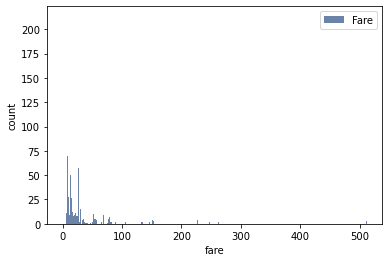

In [78]:
thinkplot.Hist(hist)
thinkplot.Config(xlabel='fare', ylabel='count')